# Load libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set_context('paper', font_scale=2) # set some nice global plotting settings


# Read in data

In [17]:
df = pd.read_csv('data/fshd_tpm_matrix.csv', index_col = 0)

In [18]:
df.head()

,C_3_1,C_3_2,C_5_1,C_5_2,F_3_1,F_3_2,F_5_1,F_5_2
gene_name,,,,,,,,
DDX11L1,0.199543,0.0000,0.275608,0.079013,1.216350,0.00000,0.00000,0.954882
WASH7P,1.628010,1.2081,1.912200,1.367780,0.944094,0.19531,1.24893,0.471472
MIR6859-1,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
MIR1302-2HG,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
MIR1302-2,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000


# Read in metadata

In [19]:
metadata = pd.read_csv('data/fshd_metadata.csv')

In [20]:
metadata.head()

,SampleID,Sample,Timepoint,Condition,Replicate
0,Control-1 Day 3 Rep 1,C_3_1,Day_3,Control,1
1,Control-1 Day 3 Rep 2,C_3_2,Day_3,Control,2
2,Control-1 Day 5 Rep 1,C_5_1,Day_5,Control,1
3,Control-1 Day 5 Rep 2,C_5_2,Day_5,Control,2
4,FSHD2-1 Day 3 Rep 1,F_3_1,Day_3,FSHD,1


# Format data for PCA and run PCA

In [21]:
input_df = df.transpose() # transpose the matrix

data = input_df.values # just get the numbers
pca = PCA(input_df.shape[0]) # compute the same # of PCs as samples
pca.fit(data) # run PCA


PCA(n_components=8)

# Get variance explained from pca object and format for plotting


In [22]:
# convert array of proportion variance explained per PC to a dataframe
var_df = pd.DataFrame(data=pca.explained_variance_ratio_,
                      columns=['explained_variance_ratio'])



In [23]:
# calculate percent variance from proportion variance (multiply column by 100)
var_df['pct_variance_explained'] = var_df['explained_variance_ratio']*100
var_df['PC'] = var_df.index + 1


In [24]:
var_df.head()

,explained_variance_ratio,pct_variance_explained,PC
0,0.614892,61.489219,1
1,0.201952,20.195247,2
2,0.091525,9.152513,3
3,0.047553,4.755336,4
4,0.031298,3.129849,5


# Bar plot of variance explained per PC

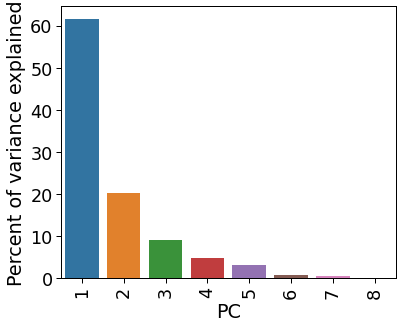

In [25]:
plt.figure(figsize=(6, 5))
sns.barplot(data=var_df, x='PC', y='pct_variance_explained')
plt.ylabel('Principal Component')
plt.ylabel('Percent of variance explained')
plt.xticks(rotation=90)
plt.show()


# Get PCA representation of the data and format for plotting

In [26]:
pca_data = pca.transform(data) 


In [27]:
pca_df = pd.DataFrame(data=pca_data)
pca_df.columns = ['PC' + str(col+1) for col in pca_df.columns]

pca_df.set_index(input_df.index, inplace=True)

# Perform a merge based on matching indices
pca_df = pca_df.merge(metadata, left_index=True, right_on='Sample')


# Plot PCA scatter plot

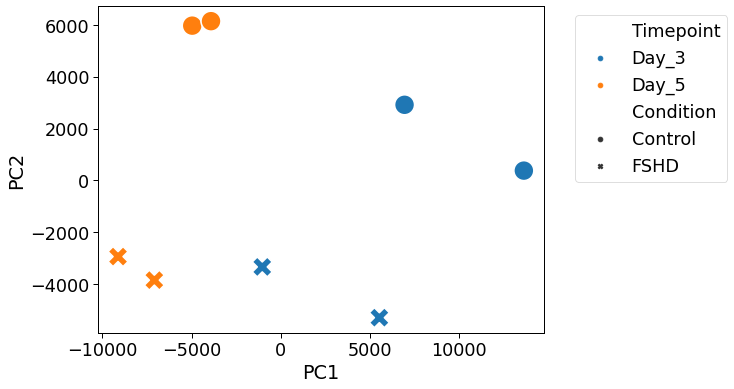

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', 
                hue = 'Timepoint', 
                s = 400, 
                style = "Condition") 

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # move legend

plt.show()


## Add % variance explained to plot

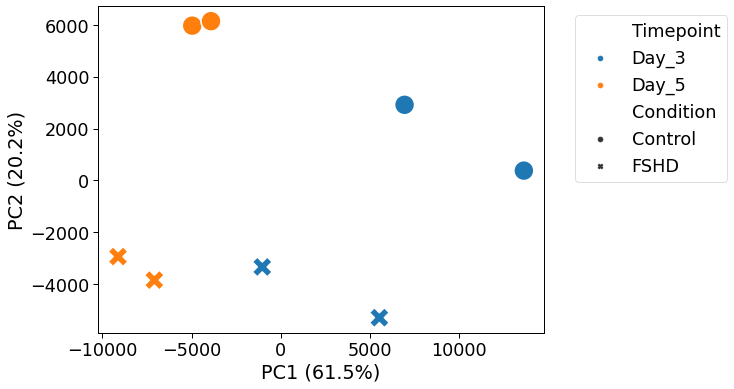

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', 
                hue = 'Timepoint', 
                s = 400, 
                style = "Condition") 

plt.xlabel(f'PC1 ({var_df["pct_variance_explained"][0]:.1f}%)')
plt.ylabel(f'PC2 ({var_df["pct_variance_explained"][1]:.1f}%)')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # move legend

plt.show()
